In [18]:
#importing various liabrary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# We want our plots to appear in the notebook
%matplotlib inline 

In [4]:
#loading data
data=pd.read_csv("data.csv")

In [5]:
# Let's check the top 5 rows of our dataframe
data.head()

,Time(Sec),Unnamed: 1,Node Number,Temperature,Humidity,CO,CO2,State of the system
0,1,2019-12-26 15:20:09.849088,1,13.77,59.11,3.76,838.42,1
1,2,2019-12-26 15:20:12.383318,1,13.75,59.54,3.76,833.53,1
2,3,2019-12-26 15:20:14.652292,1,13.70,59.80,3.68,823.75,1
3,4,2019-12-26 15:20:16.819458,1,13.63,59.46,3.68,828.64,1
4,5,2019-12-26 15:20:21.815297,1,13.56,58.98,3.59,828.64,1


In [36]:
data["State of the system"].value_counts()

1    51
2    22
3     7
Name: State of the system, dtype: int64

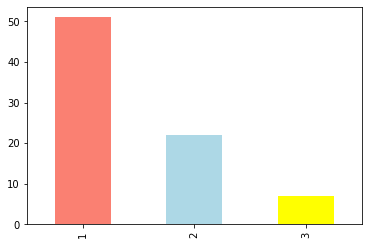

In [37]:
data["State of the system"].value_counts().plot(kind="bar", color=["salmon", "lightblue","yellow"]);

In [35]:
data.isna().sum()
#dispalying the number of missing values

Time(Sec)              0
Node Number            0
Temperature            0
Humidity               0
CO                     0
CO2                    0
State of the system    0
dtype: int64

In [7]:
data.info()#displaying datatype of all fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time(Sec)            80 non-null     int64  
 1   Unnamed: 1           79 non-null     object 
 2   Node Number          80 non-null     int64  
 3   Temperature          80 non-null     float64
 4   Humidity             80 non-null     float64
 5   CO                   80 non-null     float64
 6   CO2                  80 non-null     float64
 7   State of the system  80 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 5.1+ KB


In [8]:
data=data.drop("Unnamed: 1",axis=1)

In [9]:
x=data.drop("State of the system",axis=1)
y=data["State of the system"]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [46]:
#working with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 
np.random.seed(42)
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
knn_predictions=knn.predict(x_test)
print("KNN-score is-")
knn.score(x_test,y_test)*100

KNN-score is-


80.0

In [47]:
#hyperparameter tuning for better result
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50,2))
n_neighbors = list(range(1,30,3))
p=[1,2]
knn_2 = KNeighborsClassifier()

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
best_model = clf.fit(x_train,y_train)
clf.score(x_train,y_train)*100


95.0

In [20]:
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 4, 'p': 1}

In [49]:
#working with GaussianNB
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
print("gnb score is")
gnb.score(x_test,y_test)*100

gnb score is


90.0

In [50]:
#hyperparameter tuning for better result
np.random.seed(42)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(x_test,y_test)
gs_NB.score(x_train,y_train)*100


Fitting 5 folds for each of 100 candidates, totalling 500 fits


E:\ML-projects\employee-attrition-rate\env\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.7s finished


70.0

In [19]:
gs_NB.best_params_

{'var_smoothing': 0.657933224657568}

In [24]:
#defining  models with the best parameters
final_gs_NB=GaussianNB(var_smoothing= 0.657933224657568)
final_KNN=KNeighborsClassifier(leaf_size= 1, n_neighbors= 4, p= 1)
final_gs_NB.fit(x_train,y_train)
final_KNN.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=1,
                     weights='uniform')

In [38]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score


In [26]:
# evaluating knn model
y_preds = final_KNN.predict(x_test)
confusion_matrix(y_test, y_preds)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.50      0.67         6
           3       0.50      1.00      0.67         1

    accuracy                           0.85        20
   macro avg       0.79      0.83      0.75        20
weighted avg       0.89      0.85      0.84        20



In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_preds)

0.5588235294117648

In [57]:
#evaluating Naive Bayers model
y_preds2=final_gs_NB.predict(x_test)
print(classification_report(y_test,y_preds2))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.50      0.67         6
           3       1.00      1.00      1.00         1

    accuracy                           0.85        20
   macro avg       0.94      0.83      0.85        20
weighted avg       0.88      0.85      0.83        20



In [60]:
r2_score(y_test,y_preds2)

0.5588235294117648